In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 100

Preparing for a Measured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.108 Seconds
Building LP ...
	Done. Took 0.108 Seconds
Building M ...
	Done. Took 0.156 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished in 587 iterations
	Done. Took 8.672 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2): -0.014*(-0.008)^t + -1.283*(0.001)^t + 0.422*(0.003)^t + -0.107*(-0.004)^t + 0.981715 * delta(t,0)
		RMSE = 0.000
		Matlab: [-0.01 -0.01 -1.28  0.    0.42  0.   -0.11 -0.  ]
	Done. Took 62.918 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3): 9.999*(0.240)^t + -8.431*(0.477)^t + 2.155*(-0.190)^t + 3.203*(0.628)^t + -6.927023 * delta(t,0)
		RMSE = 0.002
		Matlab: [10.    0.24 -8.43  0.48  2.16 -0.19  3.2   0.63]
	Done. Took 49.558 Seconds
Learning Convolution for Q(2,1) ...
	Q(2,1): 0.081*(0.031)^t + -2.368*(0.007)^t + -3.192*(0.012)^t + 0.706*(-0.027)^t + 4.773264 * del

{0: {1: array([-0.01, -0.01, -1.28,  0.  ,  0.42,  0.  , -0.11, -0.  ]),
  2: array([10.  ,  0.24, -8.43,  0.48,  2.16, -0.19,  3.2 ,  0.63])},
 1: {0: array([ 0.08,  0.03, -2.37,  0.01, -3.19,  0.01,  0.71, -0.03]),
  2: array([ 0.16,  0.04,  1.05,  0.04, -0.09,  0.23,  0.22, -0.12])},
 2: {0: array([-2.15,  0.47,  1.77,  0.66,  3.67,  0.09, -0.33,  0.95]),
  1: array([-1.75,  0.  , -0.08, -0.02, -0.76,  0.  ,  0.08,  0.02])}}

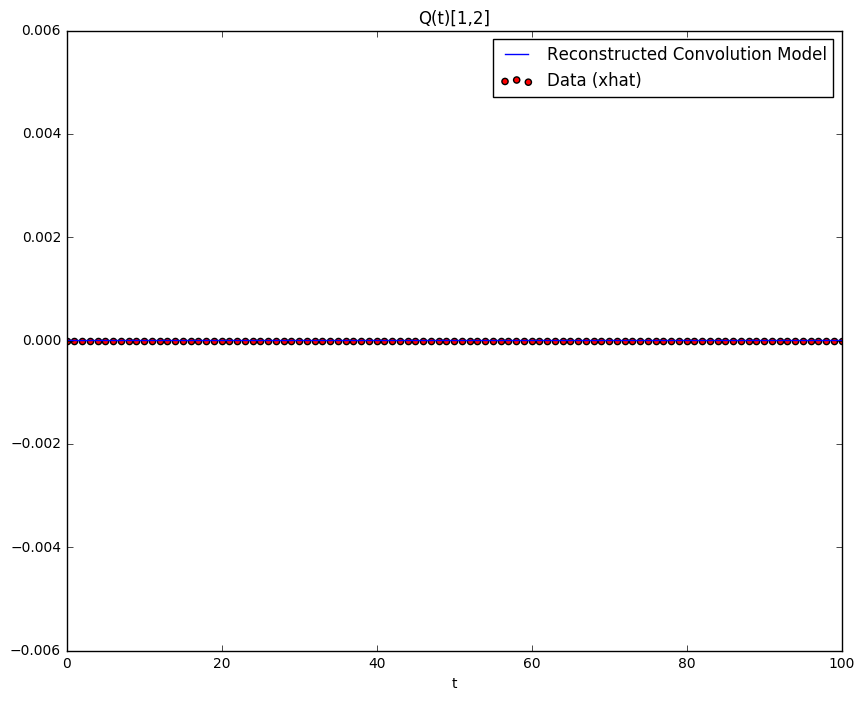

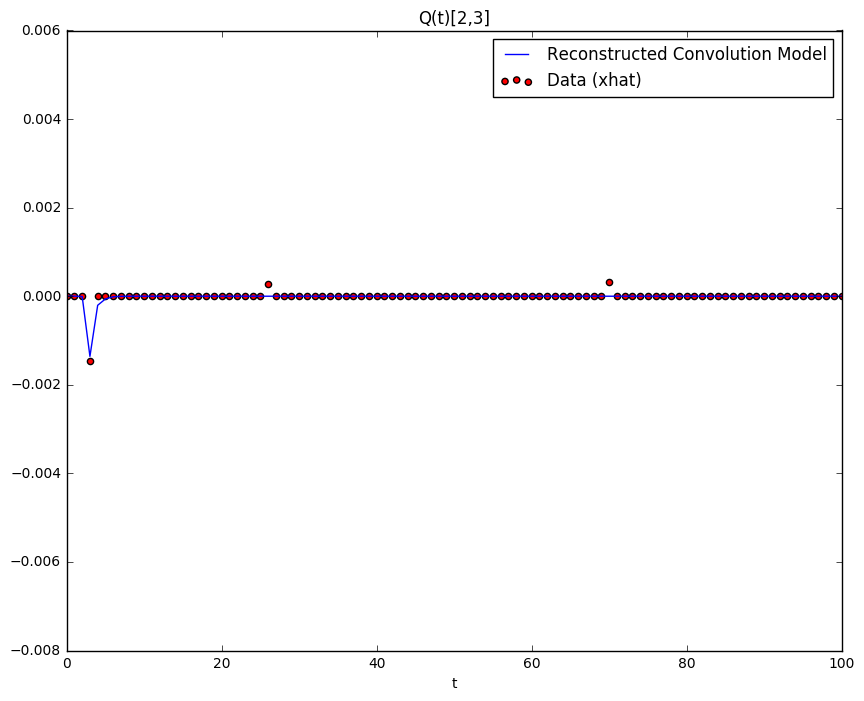

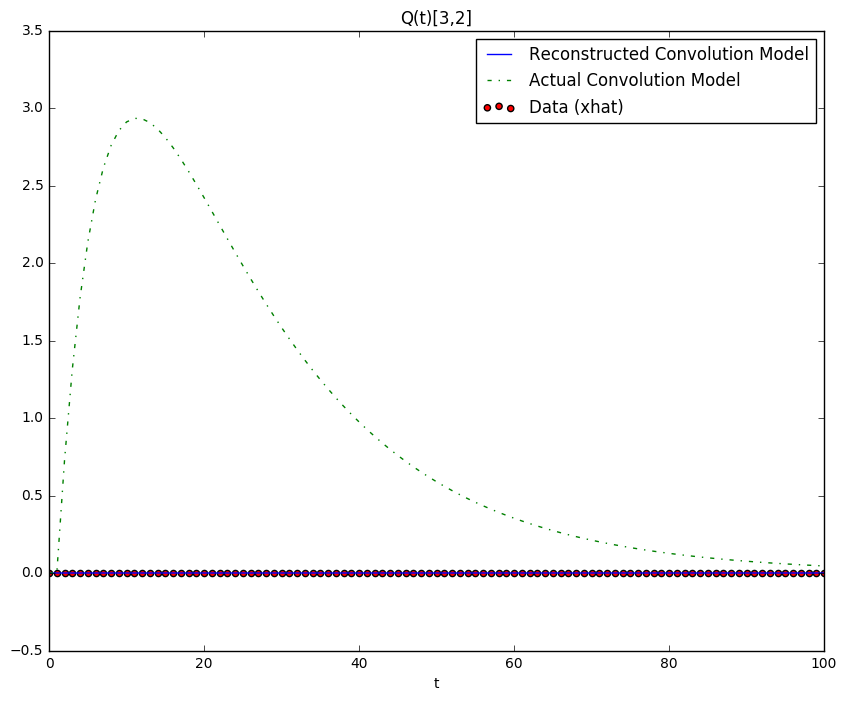

In [2]:
%matplotlib inline
A = [
    [0.75, 0, 0, 0, 0, 1.2],
    [-.1, -.35, 0, 0, 0, 0],
    [0, 0, .85, -1, 0, 0],
    [0, -.73, 0, .95, 0, 0],
    [0, 0, .43, 0, -.6, 0],
    [0, 0, 0, 0, .2, .55]

]
A = np.array(A)
B = [
    [1.4, 0, 0],
    [0, -.25, 0],
    [0, 0, 0.75],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]
B = np.array(B)
C = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]
C = np.array(C)

# u = pd.read_csv('../scripts/u.csv', header=None).values
u = np.random.rand(R * 6 + 1, 3) * 2 - 1
y = ss_sim(A, B, C, u)

Pbool = np.identity(3)

real_params = {
    (1, 3): [.51, .75, -.11, -.6, -.816, .55],
    (2, 1): [.286, -.35],
    (3, 2): [7.684, .95, -8.588, .85]
}

recon = Reconstructor(debug=True, r=R, Pbool=Pbool, max_iterations=1000, bounds=10, order=4, real_params=real_params, 
                      robust=True, criterion='aic')
recon.measured(y, u, plot=True)  #, ij=(1,3))